In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_current = 1
f = 0
step = 0.01
x_start = 0
x_end = 1
t_start = 0
t_end = 1
u_dirichlet = 0
u0_func = lambda x: 1 * (0.3 <= x < 0.4)  # 1 * True = 1 / 1 * False = 0

In [3]:
x = np.arange(x_start, x_end+step, step)
u0 = np.vectorize(u0_func)(x)
time = np.arange(t_start, t_end+step, step)

In [4]:
def build_rhs(step, f, left_dirichlet, u_prev):
    dim = u_prev.size
    rhs = f * np.ones(dim)
    rhs[0] + left_dirichlet
    return rhs + step * u_prev

In [5]:
def indexer(i, j):
    if i == j:
        return step * x_current + step
    elif i == j+1:
        return - step * x_current 
    else:
        return 0

def build_mat(dim):
    return np.fromfunction(np.vectorize(indexer), (dim, dim))

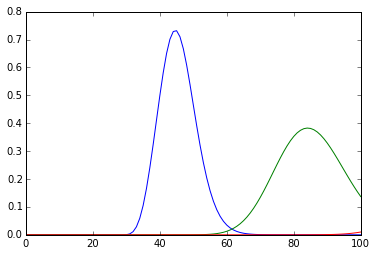

In [6]:
u_prev = u0
for t in time:
    rhs = build_rhs(step, f, u_dirichlet, u_prev)
    mat = build_mat(u_prev.size)
    u_prev = np.linalg.solve(mat, rhs)
    if t == 0.5 or t == 0.1:
        plt.plot(u_prev)
plt.plot(u_prev)
plt.show()

$$h b_{x} u_{t,1} - h b_{x} u_g(0, t) + h b_{y} u_{t,1} - h b_{y} u_{t-1,1} = f1 := \int_{T_{t,1}} f(x) dx$$
$$h b_{x} u_{t,j} - h b_{x} u_{t,j-1} + h b_{y} u_{t,j} - h b_{y} u_{t-1,j} = fj := \int_{T_{t,j}} f(x) dx$$

daraus folgt:

\begin{equation}

    \begin{pmatrix}
        h b_{x} + h b_{y} \\
        -h b_{x} & h b_{x} + h b_{y} \\
        & \ddots & \ddots \\
        & -h b_{x} & h b_{x} + h b_{y} \\
    \end{pmatrix}
    
    \begin{pmatrix}
    	u_{t,1} \\
        u_{t,2} \\
        \vdots  \\
        u_{t,j} \\
        \vdots  \\
        u_{t,n} \\
    \end{pmatrix}
    
    =
    
    \begin{pmatrix}
        f_{1} + h b_{y} u_{t-1,1} + h b_{x} u_g(0, t) \\
        f_{2} + h b_{y} u_{t-1,2} \\
        \vdots  \\
        f_{j} + h b_{y} u_{t-1,j} \\
        \vdots  \\
        f_{n} + h b_{y} u_{t-1,n} \\
    \end{pmatrix}
\end{equation}